In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import plotting_tools as pt
import scipy.stats as stats


%matplotlib inline

# this notebook is looking at how the final selection compares to the MGS in each band pass
# 0 spec.z, 
# 1 galex.fuv_mag, 
# 2 galex.nuv_mag, 
# 3 sdss.modelMag_u, 
# 4 sdss.modelMag_g,
# 5 sdss.modelMag_r,
# 6 sdss.modelMag_i,
# 7 sdss.modelMag_z
# 8 ukidss.yPetroMag, 
# 9 ukidss.j_1PetroMag,
# 10 ukidss.hPetroMag,
# 11 ukidss.kPetroMag,
# 12 wise.w1mpro ,  
# 13 wise.w2mpro , 


def kernel_density_estimation(x,y):
    xmin = np.min(x)
    xmax = np.max(x)
    ymin = np.min(y)
    ymax = np.max(y)
    # Peform the kernel density estimate
    xx, yy = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    return xx,yy,f

In [2]:
galaxies = np.load('/home/calum/Documents/Mphys_data/mgs_multiwavelength/less_strict_abs_sample.npy')
galaxies.shape

(61198, 14)

In [3]:
# begin creating colour-magnitude diagrams
# the different colours
names = ['FUV','NUV','u','g','r','i','z','Y','J','H','K','W1','W2']
indices = [i for i in range(1,14)]   
colour_combos = [i for i in itertools.combinations(indices,2)]
len(colour_combos), len(names), len(indices)

(78, 13, 13)

In [4]:
#for i,colrow in enumerate(colour_combos):
#    print(i,names[colrow[0]-1]+'-'+names[colrow[1]-1])

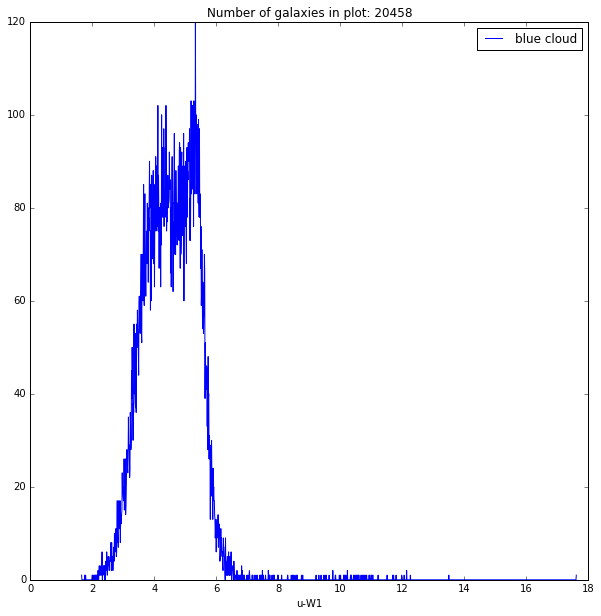

In [8]:
# histograms
plt.figure(figsize=(10,10))
colrow= [3,12]
y = [row[colrow[0]]-row[colrow[1]] for row in [row for row in galaxies if 0.08>row[0]>0.004 and 999>row[colrow[0]]-row[colrow[1]] > -999]]  
pt.plot_hist(y,200,'blue cloud',set_bin_size=True, bin_size=0.01,normed=False)
plt.title('Number of galaxies in plot: '+str(len(y)))
plt.legend()
label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
plt.xlabel(label)

In [26]:
#plt.figure(figsize=(20,80))
colrow= [2,5]

x = [row[colrow[1]] for row in [row for row in galaxies if 0.1>row[0]>0.004 and 999>row[colrow[0]]-row[colrow[1]] > -999]]
y = [row[colrow[0]]-row[colrow[1]] for row in [row for row in galaxies if 0.1>row[0]>0.004 and 999>row[colrow[0]]-row[colrow[1]] > -999]]  
xx,yy,f = kernel_density_estimation(x,y)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 8 Text yticklabel objects>)

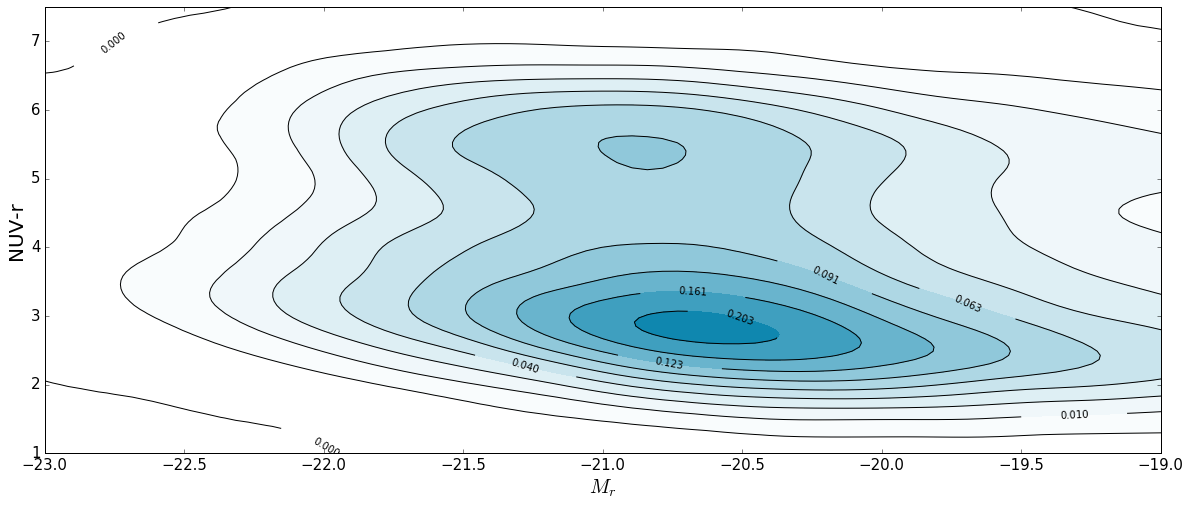

In [38]:
colrow= [2,5]

fig = plt.figure(figsize=(20,8))
ax = fig.gca()
# Contourf plot
cfset = ax.contourf(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], cmap='ocean_r',)
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], colors='k',alpha=1.)
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
ax.set_ylabel(label,fontsize=20)
ax.set_xlabel('$M_{r}$',fontsize =20)
ax.set_ylim(1,7.5)
ax.set_xlim(-23,-19)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [14]:
#plt.figure(figsize=(20,80))
colrow= [3,5]

urx = [row[colrow[1]] for row in [row for row in galaxies if 0.08>row[0]>0.004 and 3.5>row[colrow[0]]-row[colrow[1]] > 0]]
ury = [row[colrow[0]]-row[colrow[1]] for row in [row for row in galaxies if 0.08>row[0]>0.004 and 3.5>row[colrow[0]]-row[colrow[1]] > 0]]  
urxx,uryy,urf = kernel_density_estimation(urx,ury)

(array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 <a list of 6 Text yticklabel objects>)

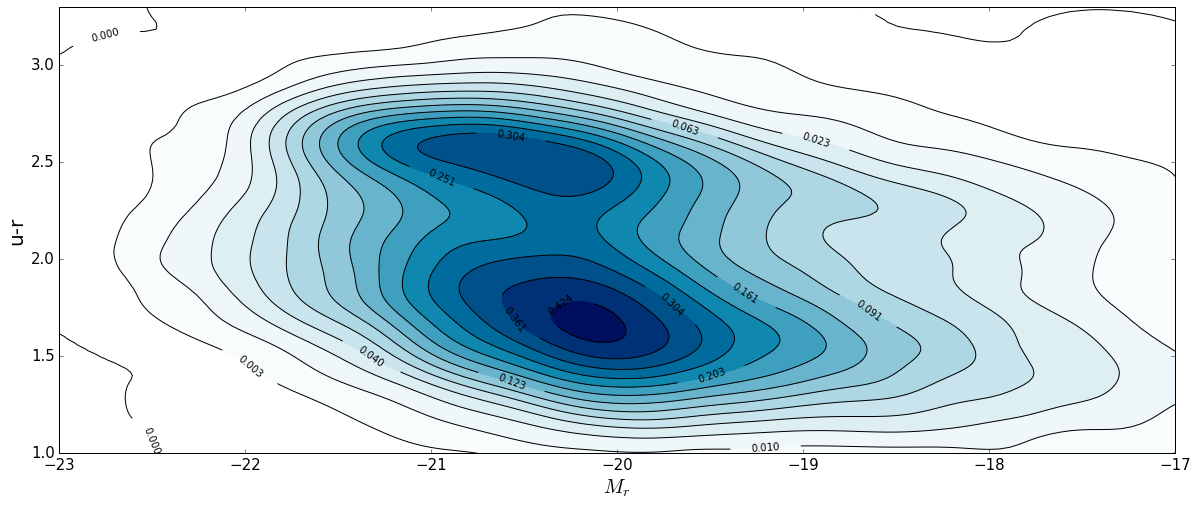

In [37]:
colrow= [3,5]

fig = plt.figure(figsize=(20,8))
ax = fig.gca()
# Contourf plot
cfset = ax.contourf(urxx, uryy, urf,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], cmap='ocean_r',)
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(urxx, uryy, urf,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)],colors='k',alpha=1.)
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
ax.set_ylabel(label,fontsize=20)
ax.set_xlabel('$M_{r}$',fontsize=20)
ax.set_ylim(1.,3.3)
ax.set_xlim(-23,-17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [28]:
#plt.figure(figsize=(20,80))
colrow= [3,10]

uhx = [row[colrow[1]] for row in [row for row in galaxies if 0.1>row[0]>0.004 and 999>row[colrow[0]]-row[colrow[1]] > -999]]
uhy = [row[colrow[0]]-row[colrow[1]] for row in [row for row in galaxies if 0.1>row[0]>0.004 and 999>row[colrow[0]]-row[colrow[1]] > -999]]  
uhxx,uhyy,uhf = kernel_density_estimation(uhx,uhy)

(array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5]),
 <a list of 10 Text yticklabel objects>)

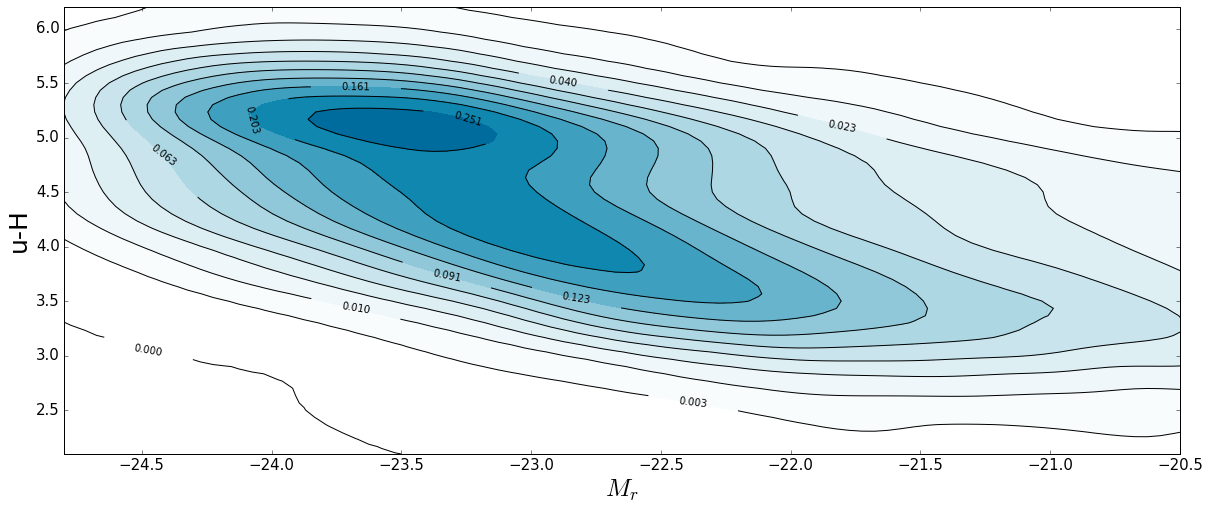

In [36]:
colrow= [3,10]

fig = plt.figure(figsize=(20,8))
ax = fig.gca()
# Contourf plot
cfset = ax.contourf(uhxx, uhyy, uhf,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], cmap='ocean_r',)
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(uhxx, uhyy, uhf,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)],colors='k',alpha=1.)
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
ax.set_ylabel(label,fontsize=25)
ax.set_xlabel('$M_{r}$',fontsize=25)
ax.set_ylim(2.1,6.2)
ax.set_xlim(-24.8,-20.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [12]:
colrow= [9,12]

jwx = [row[colrow[1]] for row in [row for row in galaxies if 0.1>row[0]>0.004 and 999>row[colrow[0]]-row[colrow[1]] > -999]]
jwy = [row[colrow[0]]-row[colrow[1]] for row in [row for row in galaxies if 0.1>row[0]>0.004 and 999>row[colrow[0]]-row[colrow[1]] > -999]]  
jwxx,jwyy,jwf = kernel_density_estimation(jwx,jwy)

(-25.5, -21.3)

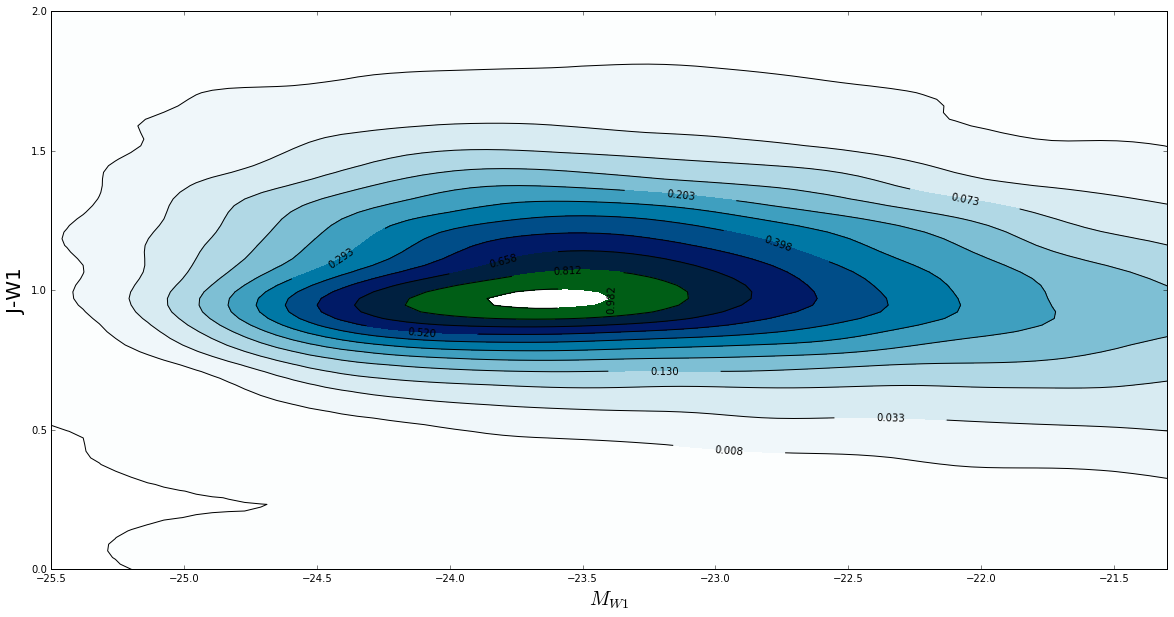

In [13]:
colrow= [9,12]

fig = plt.figure(figsize=(20,10))
ax = fig.gca()
# Contourf plot
cfset = ax.contourf(jwxx, jwyy, jwf,levels=[np.power(x,2) for x in np.arange(0.001,1.,0.09)], cmap='ocean_r',)
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(jwxx, jwyy, jwf,levels=[np.power(x,2) for x in np.arange(0.001,1.,0.09)],colors='k',alpha=1.)
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
ax.set_ylabel(label,fontsize=20)
ax.set_xlabel('$M_{W1}$',fontsize=20)
ax.set_ylim(0,2.)
ax.set_xlim(-25.5,-21.3)

In [15]:
colrow= [2,13]

nuvwx = [row[colrow[1]] for row in [row for row in galaxies if 0.1>row[0]>0.004 and 999>row[colrow[0]]-row[colrow[1]] > -999]]
nuvwy = [row[colrow[0]]-row[colrow[1]] for row in [row for row in galaxies if 0.1>row[0]>0.004 and 999>row[colrow[0]]-row[colrow[1]] > -999]]  
nuvwxx,nuvwyy,nuvwf = kernel_density_estimation(nuvwx,nuvwy)

(array([  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 8 Text yticklabel objects>)

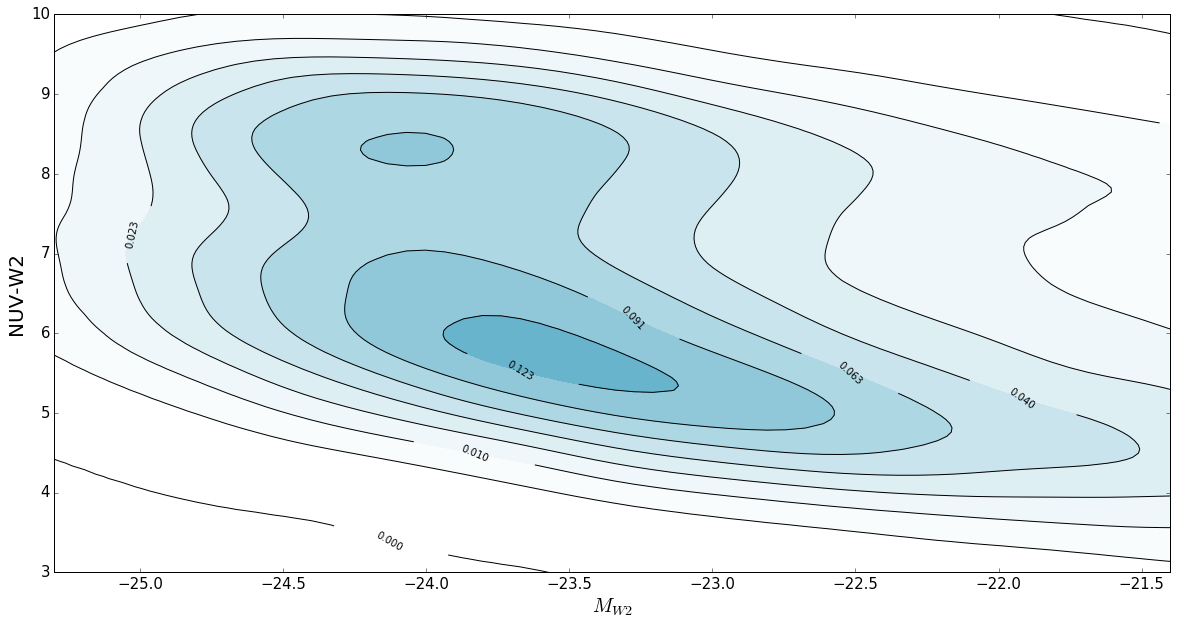

In [35]:
colrow= [2,13]

fig = plt.figure(figsize=(20,10))
ax = fig.gca()
# Contourf plot
cfset = ax.contourf(nuvwxx, nuvwyy, nuvwf,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], cmap='ocean_r',)
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(nuvwxx, nuvwyy, nuvwf,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)],colors='k',alpha=1.)
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
ax.set_ylabel(label,fontsize=20)
ax.set_xlabel('$M_{W2}$',fontsize=20)
ax.set_ylim(3,10)
ax.set_xlim(-25.3,-21.4)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [17]:
colrow= [3,13]

uwx = [row[colrow[1]] for row in [row for row in galaxies if 0.08>row[0]>0.004 and 999>row[colrow[0]]-row[colrow[1]] > -999]]
uwy = [row[colrow[0]]-row[colrow[1]] for row in [row for row in galaxies if 0.08>row[0]>0.004 and 999>row[colrow[0]]-row[colrow[1]] > -999]]  
uwxx,uwyy,uwf = kernel_density_estimation(uwx,uwy)

(array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 7 Text yticklabel objects>)

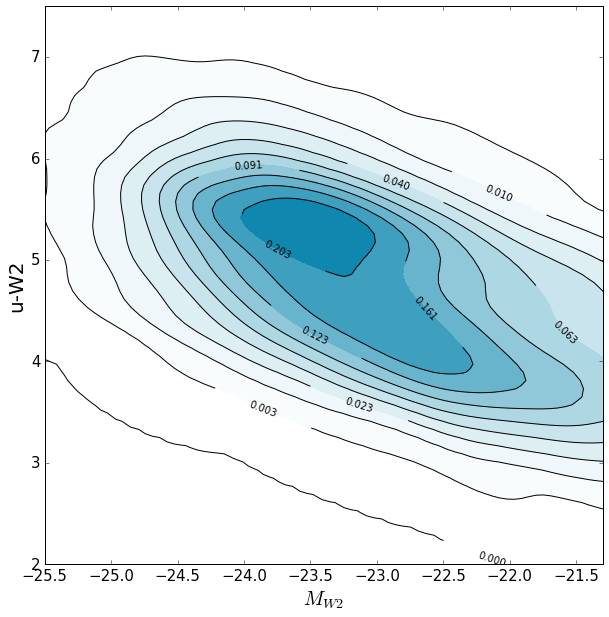

In [22]:
colrow= [3,13]

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
# Contourf plot
cfset = ax.contourf(uwxx, uwyy, uwf,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], cmap='ocean_r',)
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(uwxx, uwyy, uwf,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)],colors='k',alpha=1.)
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
ax.set_ylabel(label,fontsize=20)
ax.set_xlabel('$M_{W2}$',fontsize=20)
ax.set_ylim(2,7.5)
ax.set_xlim(-25.5,-21.3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [19]:
colrow= [4,13]

gwx = [row[colrow[1]] for row in [row for row in galaxies if 0.1>row[0]>0.004 and 999>row[colrow[0]]-row[colrow[1]] > -999]]
gwy = [row[colrow[0]]-row[colrow[1]] for row in [row for row in galaxies if 0.1>row[0]>0.004 and 999>row[colrow[0]]-row[colrow[1]] > -999]]  
gwxx,gwyy,gwf = kernel_density_estimation(gwx,gwy)

(array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 7 Text yticklabel objects>)

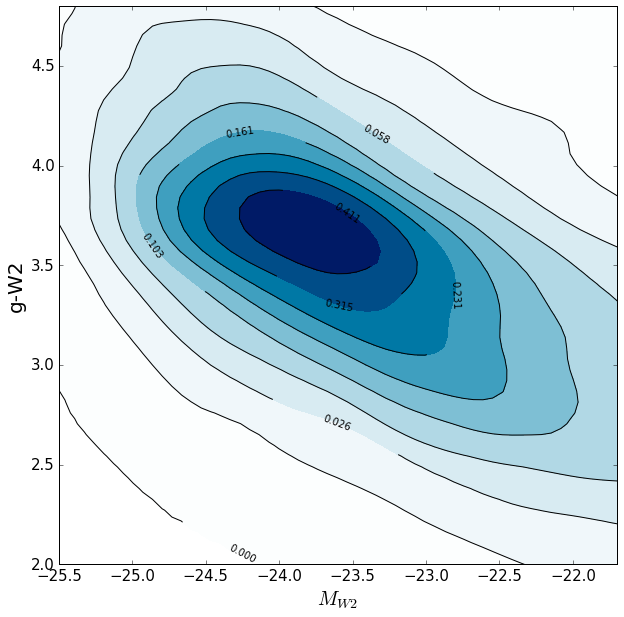

In [23]:
colrow= [4,13]

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
# Contourf plot
cfset = ax.contourf(gwxx, gwyy, gwf,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.08)], cmap='ocean_r',)
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(gwxx, gwyy, gwf,levels=[np.power(x,2) for x in np.arange(0.001,1.2,0.08)],colors='k',alpha=1.)
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
ax.set_ylabel(label,fontsize=20)
ax.set_xlabel('$M_{W2}$',fontsize=20)
ax.set_ylim(2,4.8)
ax.set_xlim(-25.5,-21.7)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)